# End-to-End Machine Learning Model: Predicting Laptop Prices
## Katrina Lawrence
### March 2024

## Overview 

## Getting the Data 

### Data Import 

In [2]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
#importing the dataset using pandas
df = pd.read_csv('laptop_data_cleaned.csv')

#displaying the first five rows of the dataset
df.head()

Company   TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0   Apple  Ultrabook    8    1.37  11.175755            0    1  226.983005   
1   Apple  Ultrabook    8    1.34  10.776777            0    0  127.677940   
2      HP   Notebook    8    1.86  10.329931            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  11.814476            0    1  220.534624   
4   Apple  Ultrabook    8    1.37  11.473101            0    1  226.983005   

       Cpu_brand  HDD  SSD Gpu_brand      Os  
0  Intel Core i5    0  128     Intel     Mac  
1  Intel Core i5    0    0     Intel     Mac  
2  Intel Core i5    0  256     Intel  Others  
3  Intel Core i7    0  512       AMD     Mac  
4  Intel Core i5    0  256     Intel     Mac

In [4]:
#converting all of the column titles into lower case
df.columns = map(str.lower, df.columns)
df.columns

Index(['company', 'typename', 'ram', 'weight', 'price', 'touchscreen', 'ips',
       'ppi', 'cpu_brand', 'hdd', 'ssd', 'gpu_brand', 'os'],
      dtype='object')

### Data Size and Type 

In [5]:
#size of the data
df_size = df.size
print(f"The size of the dataset is {df_size}")

The size of the dataset is 16549


In [6]:
#type of data
type(df)

pandas.core.frame.DataFrame

In [7]:
#loooking at the datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      1273 non-null   object 
 1   typename     1273 non-null   object 
 2   ram          1273 non-null   int64  
 3   weight       1273 non-null   float64
 4   price        1273 non-null   float64
 5   touchscreen  1273 non-null   int64  
 6   ips          1273 non-null   int64  
 7   ppi          1273 non-null   float64
 8   cpu_brand    1273 non-null   object 
 9   hdd          1273 non-null   int64  
 10  ssd          1273 non-null   int64  
 11  gpu_brand    1273 non-null   object 
 12  os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [8]:
#looking at the descriptive statistics
df.describe()

ram       weight        price  touchscreen          ips  \
count  1273.000000  1273.000000  1273.000000  1273.000000  1273.000000   
mean      8.447761     2.041100    10.828218     0.146897     0.279654   
std       5.098771     0.669241     0.619565     0.354142     0.449006   
min       2.000000     0.690000     9.134616     0.000000     0.000000   
25%       4.000000     1.500000    10.387379     0.000000     0.000000   
50%       8.000000     2.040000    10.872255     0.000000     0.000000   
75%       8.000000     2.310000    11.287447     0.000000     1.000000   
max      64.000000     4.700000    12.691441     1.000000     1.000000   

               ppi          hdd          ssd  
count  1273.000000  1273.000000  1273.000000  
mean    146.950812   413.715632   186.252946  
std      42.926775   518.054486   186.531571  
min      90.583402     0.000000     0.000000  
25%     127.335675     0.000000     0.000000  
50%     141.211998     0.000000   256.000000  
75%     157.350512  1000.000000   256.000000  
max     352.465147  2000.000000  1024.000000

### Available Features 

In [9]:
#looking at all of the available attributes of the data, their null count, and their data type
df.loc[:, df.columns != 'price'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      1273 non-null   object 
 1   typename     1273 non-null   object 
 2   ram          1273 non-null   int64  
 3   weight       1273 non-null   float64
 4   touchscreen  1273 non-null   int64  
 5   ips          1273 non-null   int64  
 6   ppi          1273 non-null   float64
 7   cpu_brand    1273 non-null   object 
 8   hdd          1273 non-null   int64  
 9   ssd          1273 non-null   int64  
 10  gpu_brand    1273 non-null   object 
 11  os           1273 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 119.5+ KB


### Target Identification 

In [10]:
#identifying the target attribute (regression tasks require a target variable)
#for this projection, the laptop price will be predicted, hence it will be the target variable
#this target attribute will be denoted as y

y = df['price']
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1268    10.555257
1269    10.433899
1270    11.288115
1271     9.409283
1272    10.614129
Name: price, Length: 1273, dtype: float64

### Data Splitting 

In [11]:
from sklearn.model_selection import train_test_split

#creating a training and test set
#20% of the data will be allocated to the test set, and 80% of the data will be allocated to the training set
#the training set will be used to train the model, and the test set will be used to test the accuracy of the model

#features
X = df.loc[:, df.columns != 'price']

#target
y = df['price']


#splitting the data into a training set and a test set with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Data Exploration 

### Data Attributes & Characteristics 

In [12]:
#looking at the descriptive statistics of the numerical features
X_train.describe()

ram       weight  touchscreen          ips          ppi  \
count  1018.000000  1018.000000  1018.000000  1018.000000  1018.000000   
mean      8.493124     2.032631     0.145383     0.282908   147.100010   
std       5.184924     0.668041     0.352660     0.450633    43.789694   
min       2.000000     0.690000     0.000000     0.000000    90.583402   
25%       4.000000     1.492500     0.000000     0.000000   127.335675   
50%       8.000000     2.040000     0.000000     0.000000   141.211998   
75%       8.000000     2.300000     0.000000     1.000000   157.350512   
max      64.000000     4.700000     1.000000     1.000000   352.465147   

               hdd          ssd  
count  1018.000000  1018.000000  
mean    419.607073   186.062868  
std     515.519281   190.116137  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000   180.000000  
75%    1000.000000   256.000000  
max    2000.000000  1024.000000

In [13]:
#returning a list of all the feature names
X_train.columns

Index(['company', 'typename', 'ram', 'weight', 'touchscreen', 'ips', 'ppi',
       'cpu_brand', 'hdd', 'ssd', 'gpu_brand', 'os'],
      dtype='object')

### Visualization 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#pip install seaborn

[Text(0.5, 0, 'HDD'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship Between Price and HDD')]

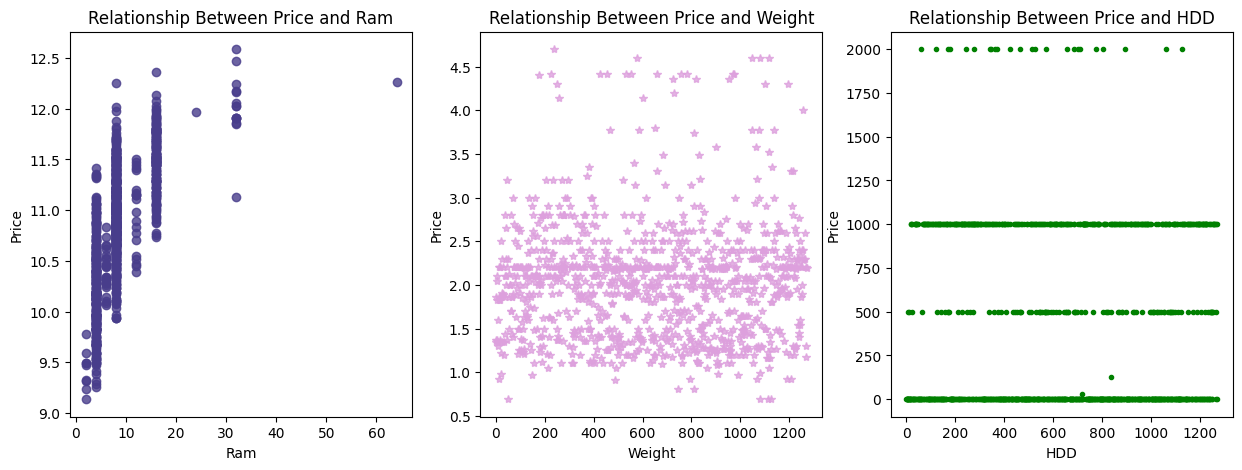

In [16]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

#plotting the ram against the price
ax[0].plot(X_train['ram'], y_train, 'o', c = 'darkslateblue', alpha = 0.8)
ax[0].set(xlabel = 'Ram', ylabel = 'Price', title = 'Relationship Between Price and Ram')

#plotting the weight against the price
ax[1].plot(X_train['weight'], '*', c = 'plum', alpha = 0.8)
ax[1].set(xlabel = 'Weight', ylabel = 'Price', title = 'Relationship Between Price and Weight')

#plotting the hdd against the price
ax[2].plot(X_train['hdd'], '.', c = 'green')
ax[2].set(xlabel = 'HDD', ylabel = 'Price', title = 'Relationship Between Price and HDD')


Text(0, 0.5, 'Values of the Numerical Features')

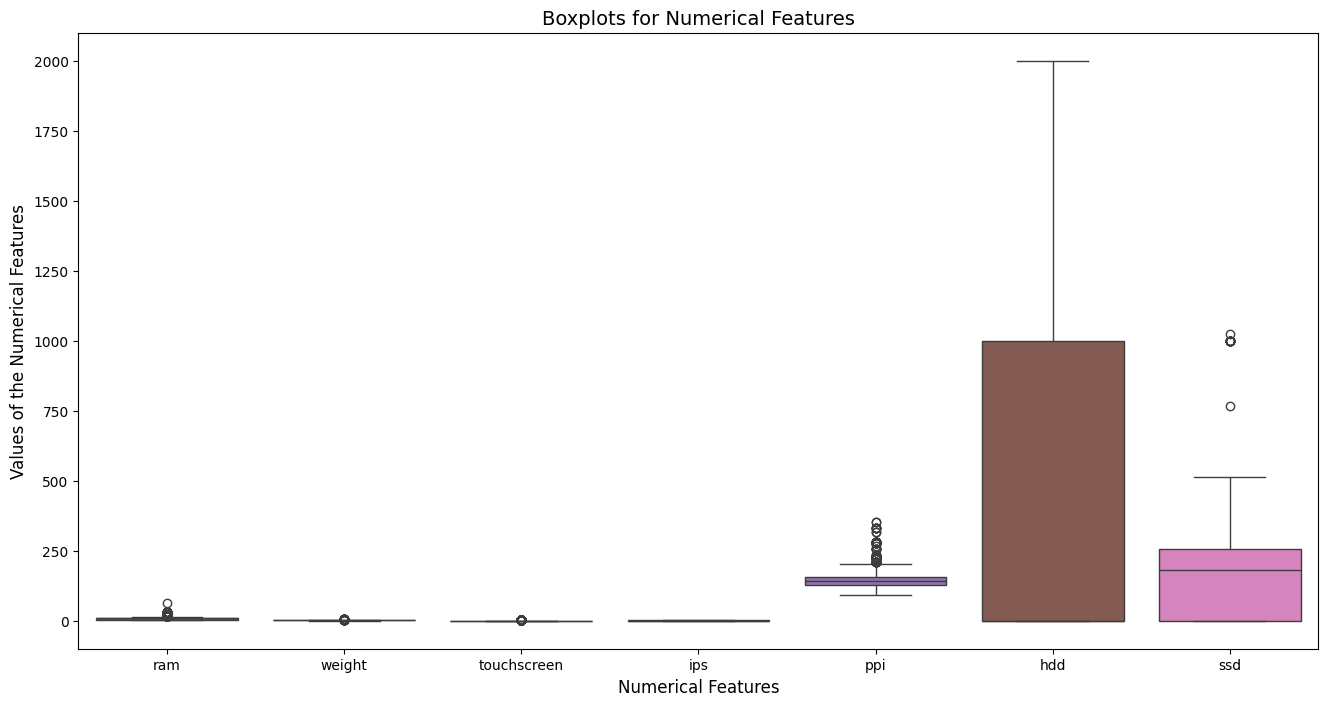

In [17]:
#boxplot of the numerical features
#the boxplots provide a sense of the distribution of each individual numerical variable and can help to identify outliers

#creating the figure and the axis
fig, ax = plt.subplots(figsize = (16,8))

#plotting the boxplot
sns.boxplot(data = X_train).set_title("Boxplots for Numerical Features", fontdict={'fontsize': 14})
ax.set_xlabel('Numerical Features',fontsize = 12)
ax.set_ylabel('Values of the Numerical Features', fontsize = 12 )

Text(0.5, 1.0, 'ips')

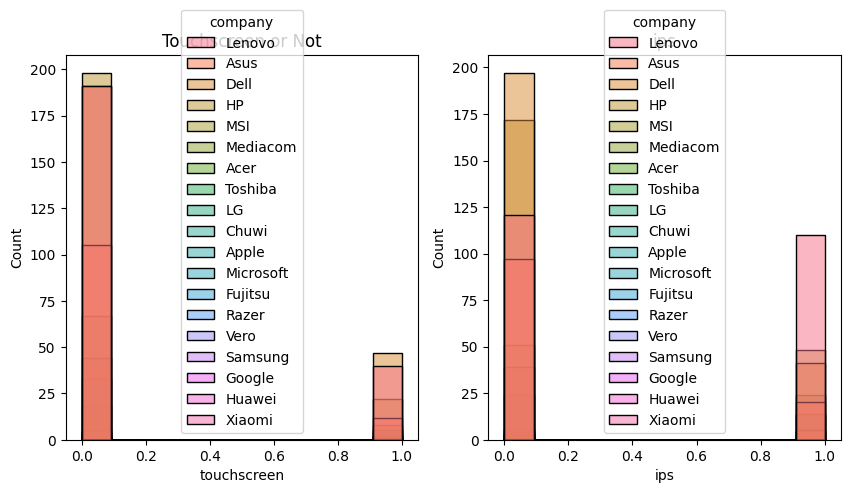

In [18]:
#plotting histograms to see the distribution of touch screen and ips

#setting up the axes
fig, axes = plt.subplots(1,2, figsize = (10,5))

#histogram of touch screen and company
sns.histplot(data = X_train, x = "touchscreen", hue = "company", ax = axes[0]).set_title("Touchscreen or Not")

#histogram of ips and company
sns.histplot(data = X_train, x = "ips", hue = "company", ax = axes[1]).set_title("ips")

### Correlations 

In [19]:
#calculating the corelation coefficients between the discrete and continuous numerical attributes 
X_corr = X_train.corr(numeric_only = True)
X_corr

ram    weight  touchscreen       ips       ppi       hdd  \
ram          1.000000  0.377358     0.098418  0.217985  0.292393  0.083590   
weight       0.377358  1.000000    -0.317961  0.021082 -0.314324  0.520701   
touchscreen  0.098418 -0.317961     1.000000  0.155484  0.438353 -0.214187   
ips          0.217985  0.021082     0.155484  1.000000  0.317838 -0.079636   
ppi          0.292393 -0.314324     0.438353  0.317838  1.000000 -0.309787   
hdd          0.083590  0.520701    -0.214187 -0.079636 -0.309787  1.000000   
ssd          0.597186 -0.066467     0.250941  0.217538  0.499417 -0.410040   

                  ssd  
ram          0.597186  
weight      -0.066467  
touchscreen  0.250941  
ips          0.217538  
ppi          0.499417  
hdd         -0.410040  
ssd          1.000000

<Axes: >

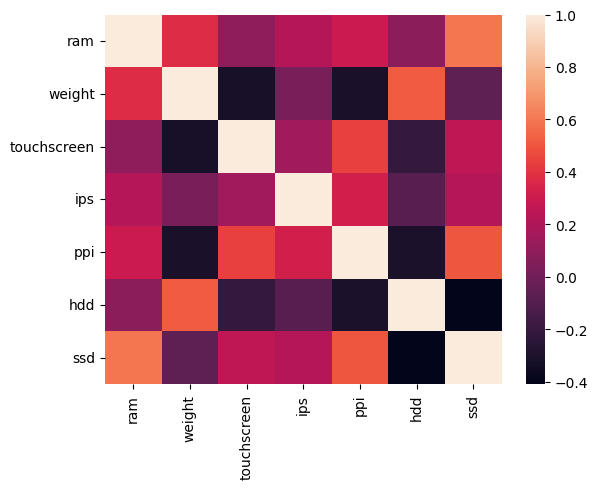

In [20]:
#creating a heatmap of the above correlation table to get a visuale sense of which features are correlated
sns.heatmap(X_corr, annot = False)

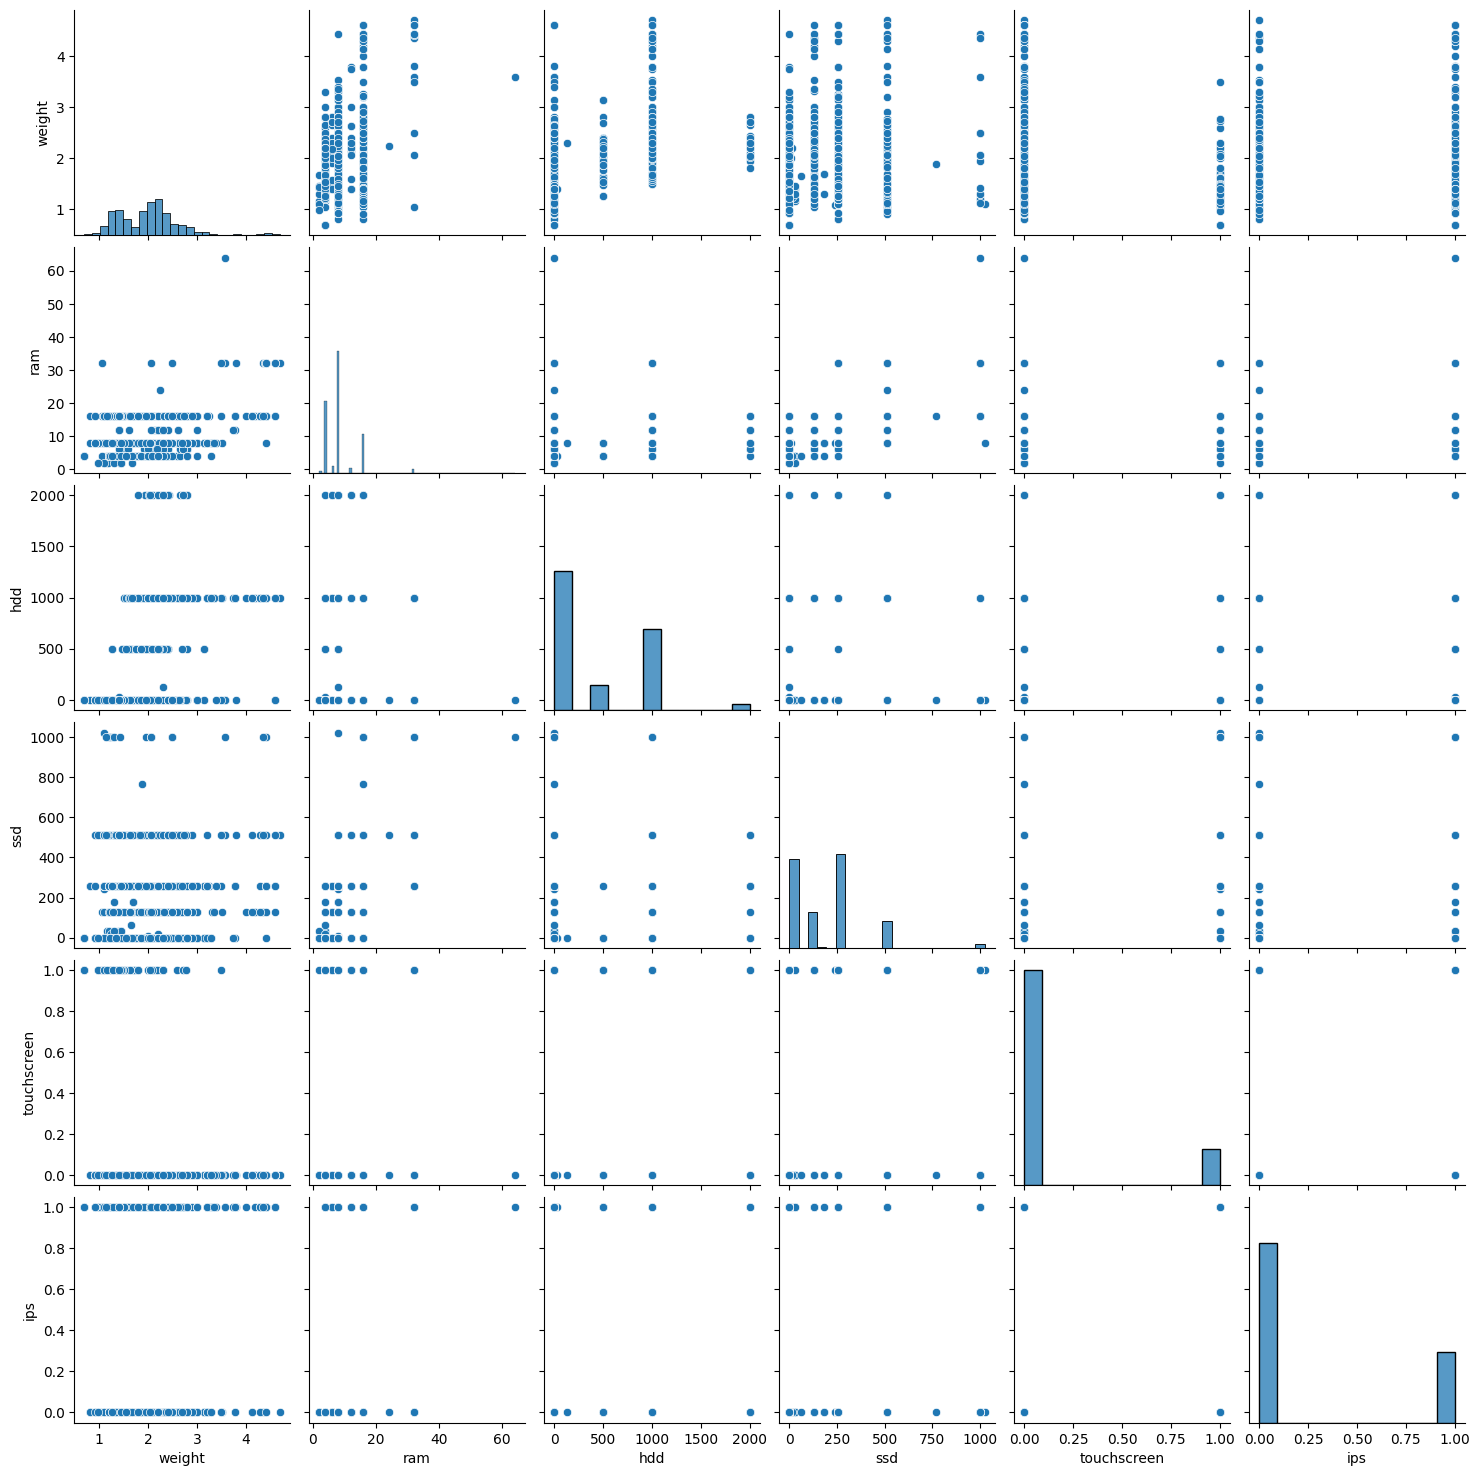

In [21]:
#matrix plot of correlation plots
#another  visual tool to understand the correlations that were already discussed above
#the diagonal plots are univariable, and will show a histogram (i.e. a distribution) of that variable 

sns.pairplot(X_train[['weight', 'ram', 'hdd', 'ssd', 'touchscreen', 'ips']])
plt.show()

## Data Preparation 

### Feature Selection 

In [26]:
#since this dataset has relatively few features, and no two features appear to have a perfect correlation with eachother, 
#all 12 features will be selected for the models
X_train.columns
X_train.head()

company            typename  ram  weight  touchscreen  ips         ppi  \
490  Lenovo            Notebook    8    2.30            0    1  141.211998   
405    Asus           Ultrabook    8    1.10            0    0  157.350512   
156  Lenovo  2 in 1 Convertible    4    1.74            1    1  157.350512   
650    Asus              Gaming   32    3.80            0    1  127.335675   
770    Dell            Notebook   16    2.30            0    0  141.211998   

         cpu_brand  hdd  ssd gpu_brand       os  
490  Intel Core i5    0  256    Nvidia  Windows  
405  Intel Core i7    0  512     Intel  Windows  
156  Intel Core i3    0  256     Intel  Windows  
650  Intel Core i7    0  512    Nvidia  Windows  
770  Intel Core i7    0  256       AMD  Windows

### Custom Transformer 

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

touchscreen_ix, ips_ix = 4,5 #index with the absence of categorical columns

#creating the custom transformer class

class NumCustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_columns = True):
        self.drop_columns = drop_columns
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X):
        
        if self.drop_columns:
            return np.delete(X, np.s_[4:6], axis = 1) #deletes touchscreen and ips columns
        
        else:
            return X #no changes are made

### Pipeline for Numerical Data (Missing Values, Feature Scaling & Custom Transformation)  

In [29]:
#imports
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [35]:
#This data set currently does not have any missing values, however, it is important to create this pipeline incase
#new data or test data have missing values down the line

#creating a pipeline for the numerical features
num_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'), #imputing the missing values with the median since its outlier resistant
    NumCustomTransformer(), #applying the custome numerical transformer that was created above
    StandardScaler() #applying a standardization scaler since ML algorithms dont usually perform well if there is a wide range 

)

In [38]:
#code check to view the output of the numerical pipeline

num_pipeline_ck = num_pipeline.fit_transform(X_train[['weight', 'ram', 'hdd', 'ssd', 'touchscreen', 'ips', 'ppi']])

num_pipeline_ck[0]

array([ 0.40042557, -0.09515399, -0.81435037,  0.36804612, -0.13452723])

### Pipeline for Categorical Data (One-Hot Encoding)

In [37]:
#imports
from sklearn.preprocessing import OneHotEncoder

#creating a pipeline for the categorical attributes that are not ordinal 
cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"), #filling missing values with the most frequent value in that column
    OneHotEncoder(drop = "first", sparse_output=False) #assigning numerical values to the categorical text values 
)

In [39]:
#codecheck
cat_pipeline_ck = cat_pipeline.fit_transform(X_train[['company', 'typename', 'cpu_brand', 'gpu_brand', 'os']])

cat_pipeline_ck[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.])

In [41]:
#Cheking the category names of the categorical variables
cat_encoder = OneHotEncoder(drop='first', sparse_output=False) # older versions of sklearn used 'sparse'
cat_1hot = cat_encoder.fit_transform(X_train[['company', 'typename', 'cpu_brand', 'gpu_brand', 'os']])
cat_encoder.categories_

[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
        'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
        'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
 array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
        'Workstation'], dtype=object),
 array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
        'Other Intel Processor'], dtype=object),
 array(['AMD', 'Intel', 'Nvidia'], dtype=object),
 array(['Mac', 'Others', 'Windows'], dtype=object)]

### Pipeline for Categorical Data (Ordinal Encoding) 

In [42]:
#imports
from sklearn.preprocessing import OrdinalEncoder

#creating a pipeline for the ordinal or binary arttibutes 
ord_pipeline = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'), #filling missing values with the most frequent value in that column
    OrdinalEncoder() #assigning ordinal numerical values to the categorical text values
)

#Please note that none of the categorical features that I chose are ordinal
#Ordinal data are discrete values that have a ranked ordering between them
#Because of this, I will use one-hot encoding for my categorical features since it can be used when there is no relationship
#between the values.
#I will however create an ordinal pipeline in case a new ordinal feature is added to the training set 

### Column Transformer 

In [43]:
from sklearn.compose import ColumnTransformer 

#stating which attributes will be passed to which pipeline
num_attributes = ['weight', 'ram', 'hdd', 'ssd', 'touchscreen', 'ips', 'ppi']
cat_attributes = ['company', 'typename', 'cpu_brand', 'gpu_brand', 'os']
ord_attributes = []


#creating a full pipeline inculding the numerical, categorical and ordinal pipelines
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
    ("ord", ord_pipeline, ord_attributes)
])

preprocessing


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('numcustomtransformer',
                                                  NumCustomTransformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['weight', 'ram', 'hdd', 'ssd', 'touchscreen',
                                  'ips', 'ppi']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['company', 'typename', 'cpu_brand',
                                  'gpu_brand', 'os']),
                                ('ord',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 [])])

### Data Transformation 

In [44]:
#using fit_transform to fit and then transform the data
#we are generating the prepared and cleaned data which can then be passed into the models
X_train_prepared = preprocessing.fit_transform(X_train)
X_train_prepared

array([[ 0.40042557, -0.09515399, -0.81435037, ...,  1.        ,
         0.        ,  1.        ],
       [-1.39675382, -0.09515399, -0.81435037, ...,  0.        ,
         0.        ,  1.        ],
       [-0.43825814, -0.86700066, -0.81435037, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.01103671, -0.09515399,  3.06713984, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.40042557, -0.09515399,  1.12639473, ...,  0.        ,
         0.        ,  1.        ],
       [-2.01079011, -0.86700066, -0.81435037, ...,  0.        ,
         0.        ,  1.        ]])

## Model Exploration 

### Model Fitting 

In [48]:
## MODEL 1 ##

#Fitting a Linear Regression Model to the Data

from sklearn.linear_model import LinearRegression

#instantiating the linear regression class
lin_reg = LinearRegression()

#fitting the model to the training data
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [49]:
## MODEL 2 ##

#Fitting a DecisionTreeRegressor Model to the Data

from sklearn.tree import DecisionTreeRegressor

#instantiate the class
tree_reg = DecisionTreeRegressor(random_state=42)

#fitting the model to the data
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(random_state=42)

In [50]:
## MODEL 3 ##

#Fitting a Stochastic Gradient Descent Model to the Data

from sklearn.linear_model import SGDRegressor

#instantiating the class
sgd_reg = SGDRegressor(max_iter = 5000, tol = 1e-5, penalty = None, eta0 = 0.01, n_iter_no_change = 100, random_state = 42)

#fitting the model to the data
sgd_reg.fit(X_train_prepared, y_train)


SGDRegressor(max_iter=5000, n_iter_no_change=100, penalty=None, random_state=42,
             tol=1e-05)

In [51]:
## MODEL 4 ##

#Fitting a Support Vector Machine Model to the data and applying the kernel trick

from sklearn.svm import SVR

#instantiate the class
svm_reg = SVR(kernel = "poly", degree =1 , C = 0.01, epsilon = 0.1)

#fitting the model to the data
svm_reg.fit(X_train_prepared, y_train)

SVR(C=0.01, degree=1, kernel='poly')

In [52]:
## MODEL 5 ##

#Fitting a Random Forest Regressor (ensemble algorithm) to the data 

from sklearn.ensemble import RandomForestRegressor

#instantiate the class
rf_reg = RandomForestRegressor(n_estimators = 100, max_leaf_nodes = 3, random_state = 16)

#ifitting the model to the data
rf_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(max_leaf_nodes=3, random_state=16)

In [54]:
## MODEL 6 ##

#Fitting a Gradient Boosting Regressor ensemble model to the data

from sklearn.ensemble import GradientBoostingRegressor

#instantiating a class object
gb_reg = GradientBoostingRegressor(n_estimators = 100, max_depth = 2, random_state = 42)

#fitting the model to the data
gb_reg.fit(X_train_prepared, y_train)

GradientBoostingRegressor(max_depth=2, random_state=42)

### Making Predictions 

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
## MODEL 1 ##

#making predictions
lin_reg_pred = lin_reg.predict(X_train_prepared)

#calculating the error between the model predicted values and the actual values
lin_reg_rmse = mean_squared_error(y_train, lin_reg_pred, squared = False)
lin_reg_rmse

0.25490448313738384

In [57]:
## MODEl 2 ##

#making predictions
tree_reg_pred = tree_reg.predict(X_train_prepared)

#calculating the error between the model predicted values and the actual values
tree_reg_rmse = mean_squared_error(y_train, tree_reg_pred, squared = False)
tree_reg_rmse

0.045527478556148235

In [58]:
## MODEL 3 ## 

#making predictions
sgd_reg_pred = sgd_reg.predict(X_train_prepared)

#calculating the error between the model predicted values and the actual values
sgd_reg_rmse = mean_squared_error(y_train, sgd_reg_pred, squared = False)
sgd_reg_rmse

0.2554174001355207

In [59]:
## MODEL 4 ##

#making predictions
svm_reg_pred = svm_reg.predict(X_train_prepared)

#calculating the error between the model predicted values and the actual values
svm_reg_rmse = mean_squared_error(y_train, svm_reg_pred, squared = False)
svm_reg_rmse

0.3319312232407084

In [60]:
## MODEL 5 ##

#making predictions
rf_reg_pred = rf_reg.predict(X_train_prepared)

#calculating the error between the model predicted values and the actual values
rf_reg_rmse = mean_squared_error(y_train, rf_reg_pred, squared = False)
rf_reg_rmse

0.3856288302760104

In [61]:
## MODEL 6 ##

#making predictions
gb_reg_pred = gb_reg.predict(X_train_prepared)

#calculating the error between the model predicted values and the actual values
gb_reg_rmse = mean_squared_error(y_train, gb_reg_pred, squared = False)
gb_reg_rmse

0.22139236135046272

### Model Comparison with Cross Validation

In [62]:
#As mentionned above, since regression tasks will be used to fit the data, the root mean squared error will be calculted
#to assess the model's performance

#The negative of the rmse is taken because python expects a utility function (not a cost function)

#Cross validation will split the training data into n folds, and for each split, one fold will be the validation set,
#and the others will be the training set. This is useful since we dont want to touch the test set until the end

from sklearn.model_selection import cross_val_score

In [63]:
#Using cross-validation to assess Model 1, with the touchscreen and ips columns removed (True)
lin_reg_rmsesT = -cross_val_score(lin_reg, X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(lin_reg_rmsesT).describe()

count    10.000000
mean      0.262306
std       0.022450
min       0.228137
25%       0.243994
50%       0.266924
75%       0.278587
max       0.292805
dtype: float64

In [64]:
#Using cross-validation to assess Model 2, with the touchscreen and ips columns removed (True)
tree_reg_rmsesT = -cross_val_score(tree_reg, X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(tree_reg_rmsesT).describe()

count    10.000000
mean      0.294284
std       0.026743
min       0.255118
25%       0.276975
50%       0.295844
75%       0.306774
max       0.340485
dtype: float64

In [65]:
#Using cross-validation to assess Model 3, with the touchscreen and ips columns removed (True)
sgd_reg_rmsesT = -cross_val_score(sgd_reg, X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(sgd_reg_rmsesT).describe()

count    10.000000
mean      0.263234
std       0.021741
min       0.233164
25%       0.244748
50%       0.267657
75%       0.280285
max       0.292349
dtype: float64

In [66]:
#Using cross-validation to assess Model 4, with the touchscreen and ips columns removed (True)
svm_reg_rmsesT = -cross_val_score(svm_reg, X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
svm_reg_rmsesT
pd.Series(svm_reg_rmsesT).describe()

count    10.000000
mean      0.340701
std       0.023639
min       0.301379
25%       0.322544
50%       0.341635
75%       0.354914
max       0.376637
dtype: float64

In [67]:
#Using cross-validation to assess Model 5, with the touchscreen and ips columns removed (True)
rf_reg_rmsesT = -cross_val_score(rf_reg, X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
rf_reg_rmsesT
pd.Series(rf_reg_rmsesT).describe()

count    10.000000
mean      0.389720
std       0.024262
min       0.343485
25%       0.382654
50%       0.390565
75%       0.406524
max       0.424368
dtype: float64

In [68]:
#Using cross-validation to assess Model 6, with the touchscreen and ips columns removed (True)
gb_reg_rmsesT = -cross_val_score(gb_reg, X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
gb_reg_rmsesT
pd.Series(gb_reg_rmsesT).describe()

count    10.000000
mean      0.239662
std       0.017672
min       0.216496
25%       0.226982
50%       0.240576
75%       0.244266
max       0.272408
dtype: float64

## Fine Tuning the System 

### Model Selection & GridSearch to Fine Tune Hyperparameters 

In [70]:
#performing GridSearch on the SVM Regression Model

from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameter values
svr_param_grid = {'C': [.01, 10, 100],
                  'epsilon': [0.001, 0.1, 0.5, 1]}

#performing a GridSearch for the c and epsilon hyperparameter values 
#instantiating the GridSearch class
grid_search_cv_svm = GridSearchCV(svm_reg, svr_param_grid, verbose = 1, cv = 4)

#fitting the model to our data
grid_search_cv_svm.fit(X_train_prepared, y_train)

#getting the best estimators and saving that model
svm_model = grid_search_cv_svm.best_estimator_
svm_model

Fitting 4 folds for each of 12 candidates, totalling 48 fits


SVR(C=10, degree=1, epsilon=0.001, kernel='poly')

In [71]:
#calculating the rmses based on the new tweaked hyperparameters

svm_reg_rmsesT_final = -cross_val_score(svm_model, X_train_prepared, y_train, 
                                        scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(svm_reg_rmsesT_final).describe()

count    10.000000
mean      0.264556
std       0.025424
min       0.228823
25%       0.244292
50%       0.268859
75%       0.286492
max       0.297705
dtype: float64

In [72]:
#performing GridSearch on the SGD Regression Model

from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameter values
sgd_param_grid = {'eta0': [.005, .01, 0.5, 1],
                  'tol': [1e-6, 1e-5, 1e-4]}

#performing a GridSearch for the c and epsilon hyperparameter values 
#instantiating the GridSearch class
grid_search_cv_sgd = GridSearchCV(sgd_reg, sgd_param_grid, verbose = 1, cv = 4)

#fitting the model to our data
grid_search_cv_sgd.fit(X_train_prepared, y_train)

#getting the best estimators and saving that model
sgd_model = grid_search_cv_sgd.best_estimator_
sgd_model

Fitting 4 folds for each of 12 candidates, totalling 48 fits


C:\Users\lawre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(max_iter=5000, n_iter_no_change=100, penalty=None, random_state=42,
             tol=1e-06)

In [74]:
#calculating the rmses based on the new tweaked hyperparameters

sgd_reg_rmsesT_final = -cross_val_score(sgd_model, X_train_prepared, y_train,
                                        scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(sgd_reg_rmsesT_final).describe()

count    10.000000
mean      0.262619
std       0.022170
min       0.230678
25%       0.243649
50%       0.267485
75%       0.279294
max       0.292393
dtype: float64

### Transforming Test Data with the Pipeline 

In [76]:
X_test.head()

company            typename  ram  weight  touchscreen  ips         ppi  \
43      Acer            Notebook    4     2.2            0    1  141.211998   
1160  Lenovo           Ultrabook    8     1.7            0    0  157.350512   
128     Dell            Notebook   16     2.8            0    0  127.335675   
1232     MSI              Gaming   16     2.7            0    0  127.335675   
1193    Dell  2 in 1 Convertible    8     1.6            1    1  165.632118   

          cpu_brand   hdd  ssd gpu_brand       os  
43    Intel Core i5     0  256     Intel  Windows  
1160  Intel Core i7     0  256     Intel  Windows  
128   Intel Core i7  2000  256       AMD  Windows  
1232  Intel Core i7  1000  256    Nvidia  Windows  
1193  Intel Core i5     0  256     Intel  Windows

In [77]:
#transforming the test set using the already created pipeline
#making sure not to fit this data, only transform it

#transforming X_test
X_test_prepared = preprocessing.transform(X_test)

### Final Model Selection & Performance Measurement 

In [79]:
#make predictions using the final model
final_predictions = sgd_model.predict(X_test_prepared)

In [80]:
from sklearn.metrics import mean_squared_error

#calculating the final error
final_rmse = mean_squared_error(y_test, final_predictions, squared = False)
final_rmse

#This value is a bit higher that the mean rmse from the GridSearch, 
#but that is to be expected since the test set is being used here

0.2736413388602085

In [82]:
#pip install mlxtend

In [84]:
### Bias-Variance Tradeoff ###

#CODE GRADE DOES NOT SUPPORT MLXTEND MODULE SO I COMMENTED THIS SECTION OUT
#WHEN I RAN THE CODE, I GOT A BIAS OF ~22.53 AND A VARIANCE OF ~0.72

#Getting an estimate of the bias and variance decomposition using a bootstrapping technique with 100 samples
#The dataset will be repeatedly sampled with replacement, and an estimate of the mse, variance, and bias will be calculated

from mlxtend.evaluate import bias_variance_decomp

mse, bias, var = bias_variance_decomp(sgd_model, X_train_prepared, y_train.values, X_test_prepared, y_test.values, 
                                      loss='mse', num_rounds=100, random_seed=42)

In [85]:
#Printing the estimated mse, bias and variance values found from the above bootstap
print(f"MSE: {mse}")
print(f"Bias: {bias}")
print(f"Variance: {var}")

#There is a high bias and a low variance. This makes sense since A linear model was used to fit the data.
#This means that the model is not overfit, yet it may be underfit. 
#In particular, low bias indicates that the model has a reduced ability to capture complexities in the data and
#high variance indicates that the model may be less affected by changes to the training data and can generalize better.

MSE: 0.07597532317984478
Bias: 0.07377221061143997
Variance: 0.0022031125684048207


## Solution 

### Final Model Insights & Key Findings 

### Visualizations 

## Conclusion 